# Espectrocopia de NaI
## Limpia de los Datos

Cargamos todas las medidas que tomamos en el laboratorio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as ss
from tqdm import trange

In [2]:
#fondo_PedroBego=pd.read_table('fondo_pedroBego.txt', skiprows=8, names=['counts'])
#Na_calib_f_PedroBego=pd.read_table('Na22_PedroBego.txt', skiprows=8, names=['counts'])
fondo=pd.read_table('Espec_Sodio_Lab/Espec_Fondo.txt', skiprows=8, names=['counts'])
Na_calib_f=pd.read_table('Espec_Sodio_Lab/Espec_Calib_Na22.txt', skiprows=8, names=['counts'])
Cs_Al2mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroAl2mm.txt', skiprows=8, names=['counts'])
Cs_Al4mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroAl4mm.txt', skiprows=8, names=['counts'])
Cs_Al6mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroAl6mm.txt', skiprows=8, names=['counts'])
Cs_Al8mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroAl8mm.txt', skiprows=8, names=['counts'])
Cs_Pb2mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroPb2mm.txt', skiprows=8, names=['counts'])
Cs_Pb4mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroPb4mm.txt', skiprows=8, names=['counts'])
Cs_Pb6mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroPb6mm.txt', skiprows=8, names=['counts'])
Cs_Pb8mm_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_FiltroPb8mm.txt', skiprows=8, names=['counts'])
Cs_sinfiltro_f=pd.read_table('Espec_Sodio_Lab/Espec_Cs_SinFiltro.txt', skiprows=8, names=['counts'])
Ra_sinfiltro_f=pd.read_table('Espec_Sodio_Lab/Espec_Ra_SinFiltro.txt', skiprows=8, names=['counts'])

Podemos visualizar el espectro obtenido del fondo:

Text(0,0.5,'Cuentas')

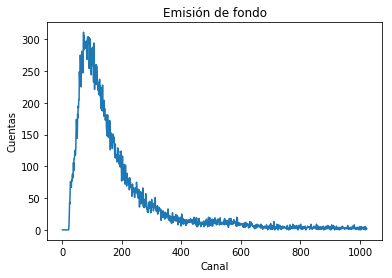

In [3]:
%matplotlib inline
plt.plot(fondo)
plt.title('Emisión de fondo')
plt.xlabel('Canal')
plt.ylabel('Cuentas')
#savefig('Espec_fondo.png')


Esta medida de fondo debe ser sustraida a todos los espectros tomado de las fuentes:

In [4]:
fondo=fondo['counts'].values
#fondo_PedroBego=fondo_PedroBego['counts'].values
Na_calib=Na_calib_f['counts'].values - fondo
#Na_calib_PedroBego=Na_calib_f_PedroBego['counts'].values - fondo_PedroBego
Cs_Al2mm=Cs_Al2mm_f['counts'].values - fondo
Cs_Al4mm=Cs_Al4mm_f['counts'].values - fondo
Cs_Al6mm=Cs_Al6mm_f['counts'].values - fondo
Cs_Al8mm=Cs_Al8mm_f['counts'].values - fondo
Cs_Pb2mm=Cs_Pb2mm_f['counts'].values - fondo
Cs_Pb4mm=Cs_Pb4mm_f['counts'].values - fondo
Cs_Pb6mm=Cs_Pb6mm_f['counts'].values - fondo
Cs_Pb8mm=Cs_Pb8mm_f['counts'].values - fondo
Cs_sinfiltro=Cs_sinfiltro_f['counts'].values - fondo
Ra_sinfiltro=Ra_sinfiltro_f['counts'].values - fondo


## Calibración de los canales a la Energía

Para obtener la relación entre el numero de canales y la energía correspondiente, es necesario utilizar una fuente de calibración (Na22) en la que se conozca la energía de sus picos de emisión. De esta manera, podemos representar el espectro del Na22 sin la emisión de fondo:

In [5]:
#%pylab 
#plt.plot(Na_calib_f_PedroBego,'black',label='Espectro con fondo')
#plt.plot(Na_calib_PedroBego,'b',label='Espectro sin fondo')
#plt.title('Espectro del Na22')
#plt.xlabel('Canal')
#plt.ylabel('Cuentas')
#plt.legend(loc=1, borderaxespad=0.)
#savefig('Na22_comparacion.png')

Es necesario realizar un ajuste gaussiano al pico de emisión de energía conocida para obtener el canal correspondiente

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.optimize import curve_fit
from scipy import exp
import matplotlib.pyplot as plt
from scipy import signal

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

def ajuste_espc(elemento, limites):
    x=np.array(range(limites[0],limites[1]))
    y=elemento[limites[0]:limites[1]]
    mean = np.sum(x*y)/np.sum(y)               
    sigma = np.sqrt(np.sum(y*np.power(x-mean,2))/np.sum(y))
    popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    perr = np.sqrt(np.diag(pcov))
    plt.plot(x,y,'b+-',label='data')
    fit1=r"fit with: $a={:.3f}\pm{:.3f}$, $x0={:.3f}\pm{:.3f}$, $sigma={:.3f}\pm{:.3f}$".format(popt[0],perr[0],popt[1],perr[1],popt[2],perr[2])
    plt.plot(x,gaus(x,*popt),'r.:',label=fit1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Ajuste')
    plt.xlabel('Chanels')
    plt.ylabel('Counts')
    
    plt.show()
    
    return popt

def ajuste_espc_2(elemento, limites):
    x=np.array(range(limites[0],limites[1]))
    y=elemento[limites[0]:limites[1]]
    mean = np.sum(x*y)/np.sum(y)               
    sigma = np.sqrt(np.sum(y*np.power(x-mean,2))/np.sum(y))
    popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    
    return popt

def ajuste_espc_sigma(elemento,mu,limites):
    x=np.array(range(limites[0],limites[1]))
    y=elemento[limites[0]:limites[1]]
    def gaus(x,a,sigma):
        return exp(-(x-mu)**2/(2*sigma**2))*a
    mean = np.sum(x*y)/np.sum(y)               
    sigma = np.sqrt(np.sum(y*np.power(x-mean,2))/np.sum(y))
    
    return curve_fit(gaus,x,y,p0=[1,sigma])


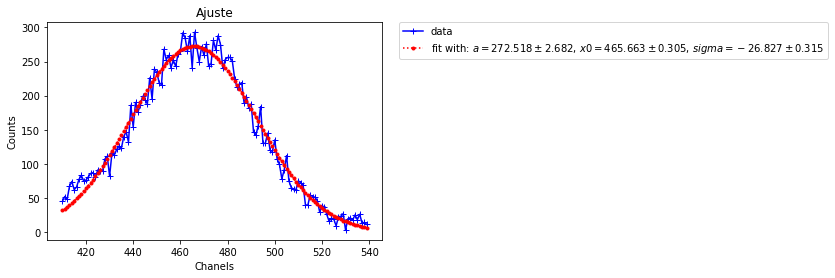

array([272.51834663, 465.66287979, -26.82658634])

In [7]:

ajuste_espc(Na_calib,[410,540])


In [8]:
def intervalo_confiaza(vector, cl):
    v_ordenado=np.sort(vector)
    print(v_ordenado)
    n=len(v_ordenado)
    d=n*cl
    if d%1>0:
        d+=1
    d=int(d) 
    
    limites0=[v_ordenado[0]]
    limites1=[v_ordenado[n-1]]
    for i in range(0,n):
        limit0=v_ordenado[i]
        indice1=i+d
        if indice1>n-1:
            break
        else:
            limites0.append(limit0)
            limites1.append(v_ordenado[indice1])
    
    distancias=np.array(limites1)-np.array(limites0)
    minima=np.min(distancias)
    j=np.where(distancias==minima)[0][0]
    return np.array((limites0[j],limites1[j]))

def ajuste_espc_simulaciones(elemento,limites0,limites1,n_simul):
    limites=[limites0[0],limites1[1]]
    limit_0=np.linspace(limites0[0],limites0[1],n_simul)
    limit_1=np.linspace(limites1[0],limites1[1],n_simul)
    x=np.array(range(limites[0],limites[1]))
    y=elemento[limites[0]:limites[1]]
    simulaciones_mean=np.ones(n_simul)
    simulaciones_sd=np.ones(n_simul)
    peso_ajuste=np.ones(n_simul)
    for i in range(0,n_simul):
        l0=np.random.randint(n_simul)
        l1=np.random.randint(n_simul)
        popt=ajuste_espc_2(elemento, [int(limit_0[l0]),int(limit_1[l1])])
        G=ss.norm(popt[0],popt[1])
        cuentas=elemento[int(limit_0[l0]):int(limit_1[l1])]
        g_aj=G.pdf(range(int(limit_0[l0]),int(limit_1[l1])))*np.sum(cuentas)
        residuo=np.sum(np.power(cuentas-g_aj,2))/np.power(limit_1[l1]-limit_0[l0],2)
        peso_ajuste[i]=1/residuo
        simulaciones_mean[i]=popt[1]
        simulaciones_sd[i]=popt[2]

    peso_ajuste=peso_ajuste/np.sum(peso_ajuste)
    ajuste_mean=np.sum(simulaciones_mean*peso_ajuste)
    popt,pcov=ajuste_espc_sigma(elemento,ajuste_mean,limites)
    perr = np.sqrt(np.diag(pcov))
    ajuste_sd=np.abs(popt[1])

    mulimits=intervalo_confiaza(simulaciones_mean,0.95)-ajuste_mean

    plt.plot(x,y,'b+-',label='data')
    fit2=r"fit with: $a={:.3f}\pm{:.3f}$ , $x0={:.3f}{:.3f}+{:.3f}$, $\sigma={:.3f}\pm{:.3f}$".format(popt[0],perr[0],ajuste_mean,mulimits[0],mulimits[1],ajuste_sd,perr[1])
    
    G=ss.norm(ajuste_mean,ajuste_sd)
    plt.plot(range(limites[0],limites[1]),G.pdf(range(limites[0],limites[1]))*np.sum(y),'r.:',label=fit2)
    plt.legend(bbox_to_anchor=(1, 1),loc='upper left')
    plt.title('Ajuste')
    plt.xlabel('Chanels')
    plt.ylabel('Counts')
    plt.show()
    
    return ajuste_mean, ajuste_sd

[465.4667163  465.4667163  465.4667163  ... 466.36413061 466.36413061
 466.36413061]


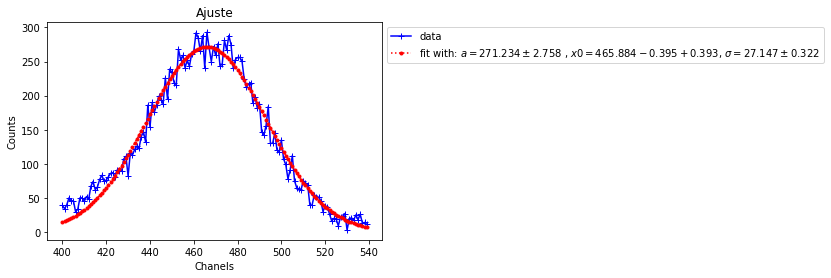

In [9]:
datos=ajuste_espc_simulaciones(Na_calib,[400,440],[500,540],10000)
#savefig('Na22_Ajuste_gauss.png')

Como no se ven dos picos vamos a utilizar el foto pico del Cs


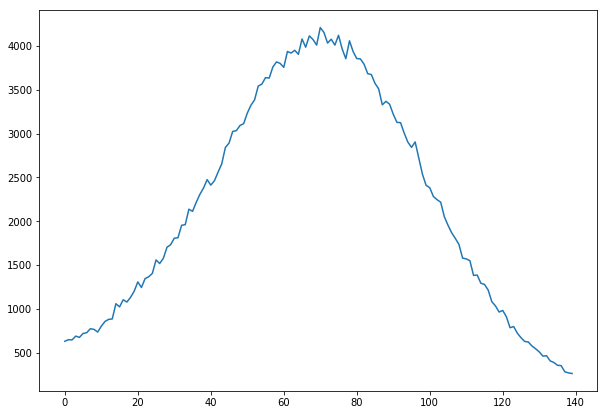

In [10]:
plt.figure(figsize=(10,7))
plt.plot(Cs_sinfiltro[540:680])

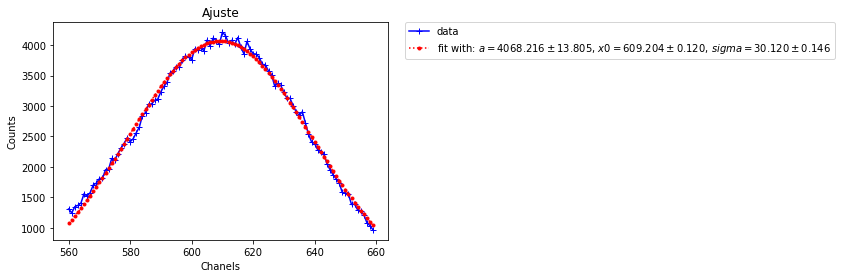

In [11]:
datos2=ajuste_espc(Cs_sinfiltro,[560,660])

In [12]:
datos[0], datos2[1]

(465.88374536051015, 609.2035192812307)

De esta manera se ha obtenido el valor central del pico gaussiano en el canal correspondiente. Conociendo el valor en energía, y suponiendo que el canal 0 tiene energía 0 (suposición necesaria debido a que no hay ningún otro pico identificable), puede realizarse un ajuste lineal para obtener la recta de calibración

1.0507970804036189 21.450720567673024


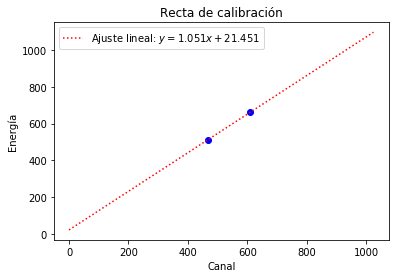

In [13]:
#El pico de emisión observado corresponde a la emisión de 511 KeV
Channel=np.array([datos[0],datos2[1]])
Energy=np.array([511,661.6])

m,b = np.polyfit(Channel, Energy, 1) #y=mx+b
plt.plot(Channel,Energy,'bo')
x=np.arange(0,1025)
lineal=r"Ajuste lineal: $y={:.3f}x + {:.3f}$".format(m,b)
plt.plot(x,m*x+b,'r:',label=lineal)
plt.title('Recta de calibración')
plt.xlabel('Canal')
plt.ylabel('Energía')
plt.legend()
print(m,b)
Energia=np.arange(0,len(Na_calib))*m + b
#savefig('Recta_de_calib.png')

Text(0.5,1,'Espectro del Na22')

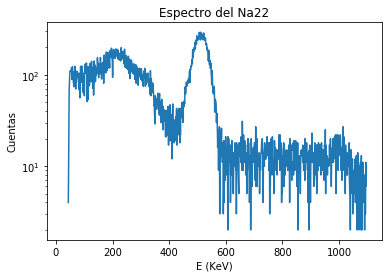

In [14]:
%matplotlib inline
plt.plot(Energia,Na_calib)
plt.yscale('log')
plt.xlabel('E (KeV)')
plt.ylabel('Cuentas')
plt.title('Espectro del Na22')
#savefig('Na22_Espec_E.png')


In [15]:
def ajuste_espc_Energy(elemento, limites, escala):
    #m=1.0503775221788605
    #b=28.854799290425348
    x=m * np.array(range(limites[0],limites[1])) + b
    y=elemento[limites[0]:limites[1]]
    mean = np.sum(x*y)/np.sum(y)               
    sigma = np.sqrt(np.sum(y*np.power(x-mean,2))/np.sum(y))
    popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    perr = np.sqrt(np.diag(pcov))
    plt.plot(Energia,elemento)
    #plt.plot(x,y,'b+-',label='data')
    fit1=r"fit with: $a={:.3f}\pm{:.3f}$, $x0={:.3f}\pm{:.3f}$, $sigma={:.3f}\pm{:.3f}$".format(popt[0],perr[0],popt[1],perr[1],popt[2],perr[2])
    plt.plot(x,gaus(x,*popt),'r.:',label=fit1)
    plt.legend(bbox_to_anchor=(1, 1),loc=4)
    #plt.title('Ajuste')
    plt.xlabel('Energía (KeV)')
    plt.ylabel('Cuentas')
    plt.yscale(escala)
    
    plt.show()
    
    return popt

Text(0.5,1,'Espectro del Cs137')

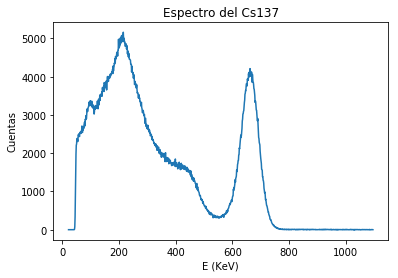

In [16]:
plt.plot(Energia,Cs_sinfiltro)
plt.xlabel('E (KeV)')
plt.ylabel('Cuentas')
plt.title('Espectro del Cs137')
#savefig('Cs137_Espec.png')

Text(0.5,1,'Espectro del Cs137')

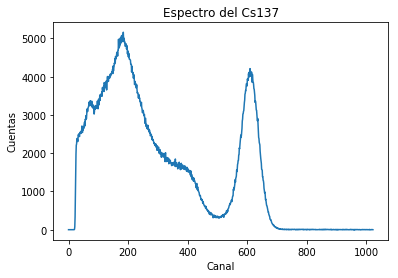

In [17]:
%matplotlib inline
plt.plot(Cs_sinfiltro)
plt.xlabel('Canal')
plt.ylabel('Cuentas')
plt.title('Espectro del Cs137')

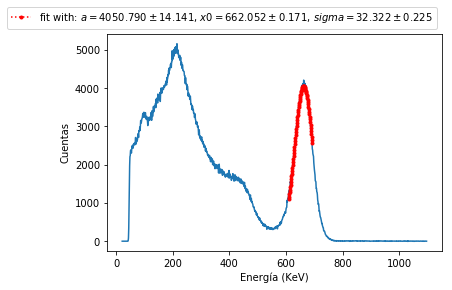

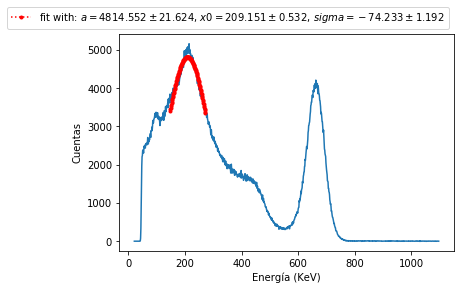

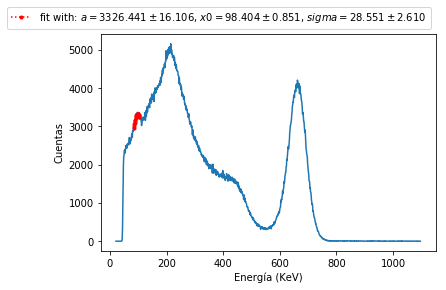

[4050.78999715  662.05229961   32.3223925 ]
[4814.55185329  209.150787    -74.23295812]
[3326.44101227   98.40417274   28.5510066 ]


In [18]:
%matplotlib inline
p_1=ajuste_espc_Energy(Cs_sinfiltro,[560,640],'linear')
p_2=ajuste_espc_Energy(Cs_sinfiltro,[120,240],'linear')
p_3=ajuste_espc_Energy(Cs_sinfiltro,[60,80],'linear')

print(p_1)
print(p_2)
print(p_3)
#savefig('Cs137_Espec_Gauss1.png')

## Filtros de Plomo y Alumnio

Variación del espectro en función del espesor del material que se interpone:

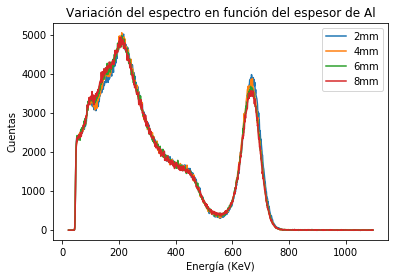

In [19]:
%matplotlib inline

plt.plot(Energia,Cs_Al2mm, label='2mm')
plt.plot(Energia,Cs_Al4mm, label='4mm')
plt.plot(Energia,Cs_Al6mm, label='6mm')
plt.plot(Energia,Cs_Al8mm, label='8mm')
plt.xlabel('Energía (KeV)')
plt.ylabel('Cuentas')
plt.title('Variación del espectro en función del espesor de Al')
plt.legend()
#savefig('Cs137_Espec_Al.png')

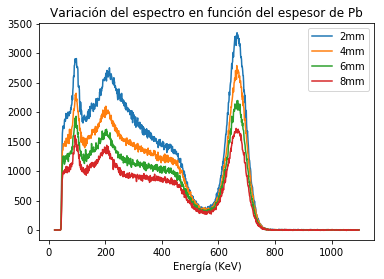

In [20]:
plt.plot(Energia,Cs_Pb2mm, label='2mm')
plt.plot(Energia,Cs_Pb4mm, label='4mm')
plt.plot(Energia,Cs_Pb6mm, label='6mm')
plt.plot(Energia,Cs_Pb8mm, label='8mm')
plt.xlabel('Energía (KeV)')
plt.title('Variación del espectro en función del espesor de Pb')
plt.legend()
#savefig('Cs137_Espec_Pb.png')

Calculemos el área bajo la curva:

In [21]:
def area_fotopico(elemento, limites):
    x=elemento[limites[0]:limites[1]]
    area=np.trapz(x)
    print('el área del fotopico de es %0.3f' % (area))
    return area
    

In [22]:
Aluminio=[Cs_Al2mm, Cs_Al4mm, Cs_Al6mm, Cs_Al8mm]
Plomo=[Cs_Pb2mm, Cs_Pb4mm, Cs_Pb6mm, Cs_Pb8mm]
Int_Al=np.zeros(len(Aluminio))
j=0
for i in Aluminio:
    area=area_fotopico(i, [530,660])
    Int_Al[j]=area
    j+=1


el área del fotopico de es 284285.500
el área del fotopico de es 277283.000
el área del fotopico de es 268169.500
el área del fotopico de es 260913.000


In [23]:
Int_Pb=np.zeros(len(Plomo))
j=0
for i in Plomo:
    area=area_fotopico(i, [530,660])
    Int_Pb[j]=area
    j+=1

el área del fotopico de es 242585.000
el área del fotopico de es 198229.500
el área del fotopico de es 162030.500
el área del fotopico de es 131029.000


-0.1546621305459258 0.003978535192404034 12.604741491779297 0.0021791334707078457
[-0.00288807  0.00288807]


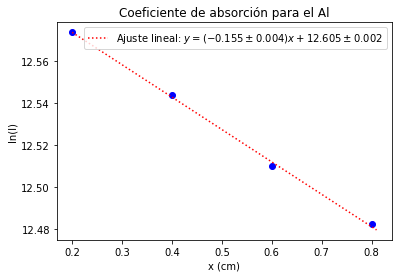

In [24]:
Int_Al=np.array([288907.000,280361.500,271000.000,263569.500])
Int_Pb=np.array([244981.000,200196.500,163128.000,131504.000])
Espesor=np.array([0.2,0.4,0.6,0.8])
(m,b),c = np.polyfit(Espesor, np.log(Int_Al), 1, cov=True) #y=mx+b
s_m,s_b=np.sqrt(c.diagonal())
plt.plot(Espesor,np.log(Int_Al),'bo')
x=np.arange(0.2,0.81,0.01)
lineal=r"Ajuste lineal: $y=({:.3f}\pm {:.3f})x + {:.3f}\pm {:.3f}$".format(m,s_m,b,s_b)
plt.plot(x,m*x+b,'r:',label=lineal)
plt.xlabel('x (cm)')
plt.ylabel('ln(I)')
plt.title('Coeficiente de absorción para el Al')
plt.legend()
plt.savefig("Ajuste_lin_Al.png")
print(m,s_m,b,s_b)
G=ss.norm(m,s_m)
G.interval(0.95)-m
print((G.interval(0.95)-m)/2.7)

-1.0355971884156008 0.011116973410668942 12.619066992901557 0.006089017108208522
[-0.02178887  0.02178887]
[-0.00191972  0.00191972]


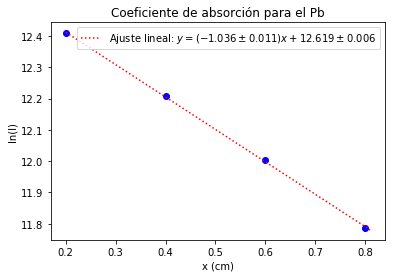

In [25]:
Espesor=np.array([0.2,0.4,0.6,0.8])
(m,b),c=np.polyfit(Espesor, np.log(Int_Pb), 1, cov=True) #y=mx+b
s_m,s_b=np.sqrt(c.diagonal())
plt.plot(Espesor,np.log(Int_Pb),'bo')
x=np.arange(0.2,0.81,0.01)
lineal=r"Ajuste lineal: $y=({:.3f}\pm {:.3f})x + {:.3f}\pm {:.3f}$".format(m,s_m,b,s_b)
plt.plot(x,m*x+b,'r:',label=lineal)
plt.xlabel('x (cm)')
plt.ylabel('ln(I)')
plt.title('Coeficiente de absorción para el Pb')
plt.legend()
plt.savefig("Ajuste_lin_Pl.png")
print(m,s_m,b,s_b)
G=ss.norm(m,s_m)
print(G.interval(0.95)-m)
print((G.interval(0.95)-m)/11.35)

In [26]:
pb=(np.log10(0.125)-np.log10(0.0887))/(np.log10(0.6)-np.log10(0.8))*(np.log10(0.6616)-np.log10(0.8))+np.log10(0.0887)
al=(np.log10(0.078)-np.log10(0.068))/(np.log10(0.6)-np.log10(0.8))*(np.log10(0.6616)-np.log10(0.8))+np.log10(0.068)
print(10**pb)
print(10**al)

0.11124904350158304
0.07444784382902611


## Espectro de Radio

Text(0,0.5,'Cuentas')

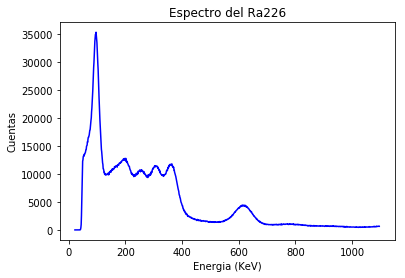

In [27]:
%matplotlib inline
plt.plot(Energia,Ra_sinfiltro,'b',label='Espectro sin fondo')
plt.title('Espectro del Ra226')
plt.xlabel('Energia (KeV)')
plt.ylabel('Cuentas')

#savefig('Ra226_Espec.png')

## Resolucion de Energia

El espectro donde mejor se observa el fotopico aislado junto a su borde compton es en el de Cs137. El cálculo de la resolución de energía en del espectrógrafo se consisigue a través del cálculo de la FWHM del ajuste gaussiano al fotopico, y la división de este valor por la energía del fotopico.


In [28]:
#(2*np.sqrt(2*np.log(2))*34.337)/670.033
print(datos2[1])
resolucion=(2*np.sqrt(2*np.log(2))*datos2[2])/661.6
print(resolucion, datos2[2])

609.2035192812307
0.107204074700455 30.119590654702808


## Borde Compton

### Teorema de convolución
Este teorema nos dice que la transformada de Fourrier de un convolución es el producto de las transformadas de fourrier

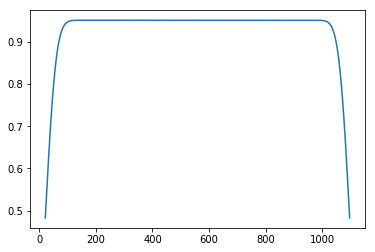

In [29]:
h=Cs_sinfiltro
x_v=Energia

sigma=np.ones(len(h))*(datos2[2])
n=len(h)
g=np.zeros(n)
for i in range(0,n):
    x=x_v[i]
    sg=sigma[i]
    g_i=ss.norm(x,sg)
    g+=g_i.pdf(x_v)
plt.plot(x_v,g)

C:\Users\santiago.arranz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\santiago.arranz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\santiago.arranz\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\fft\fftpack.py:303: RuntimeWarning: invalid value encountered in multiply
  return output * (1 / (sqrt(n) if unitary else n))
C:\Users\santiago.arranz\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


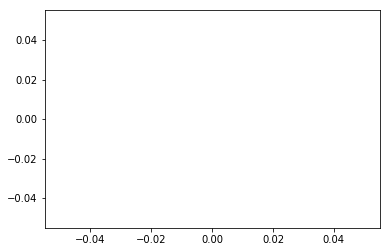

In [30]:
H=np.fft.fft(h)
G=np.fft.fft(g)
f=np.fft.ifft(H/G)
plt.plot(x_v,f)

Esta claro que este método no es válido, muy probablemente por el filtro Gaussiano

### Metodo de minimos cuadrados
Se basa en aplicar el método de minimos cuadrados a la función matricial $h=f\cdot g$

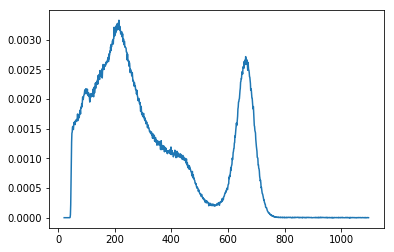

In [31]:
h=Cs_sinfiltro
x_v=Energia
datos2=ajuste_espc_2(h,[560,660])
sigma=datos2[2]/661.6
def g_m(x,nu):
    i=np.where(x_v==x)
    sg=sigma
    G=ss.norm(x,sg)
    return G.pdf(nu)
#Creamos la matriz de convolucion g(x-nu)*f(n)

#Función de probabilidad que sigue una Poisson
def p_m(x,nu):
    lamb=x
    P=ss.poisson(lamb)
    #salida=np.zeros(len(nu))
    return P.pmf(nu.astype(int))
#Creamos la matriz de convolucion g(x-nu)*f(n)
n=len(h)
p_matriz=np.asmatrix(np.zeros([n,n]))
for i in range(0,n):
    x=x_v[i]
    nu=x_v
    p_matriz[:,i]=g_m(x,nu).reshape((n,1))
#i=0
#for x in x_v:
#    P=ss.poisson(x)
#    #G=ss.norm(x,datos2[2])
#    p_matriz[i,i]=P.pmf(np.int(x))
#    i+=1


matriz=np.dot(p_matriz,p_matriz.T)
f=np.asarray(np.dot(h,np.dot(p_matriz.T,matriz.I))).reshape(n)
plt.plot(x_v,f/np.sum(f))


No vemos ninguna mejora con respecto al espectro observado

### Algoritomo de Deconvolución de Gold
$$y=Hx$$
$$H^Ty=H^THx$$
$$y'=H'x$$
$$x^{k+1}_i=\frac{y'_i}{\sum_{j=0}^kH'_{i,j}x_{j}^k}x_i^k$$

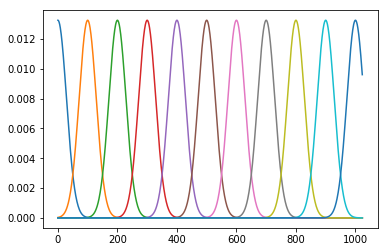

In [141]:
h=Cs_sinfiltro
#h=Na_calib
#h=Ra_sinfiltro
x_v=Energia
n=len(h)
datos2=ajuste_espc_2(h,[560,660]) #Datos para el Cs
#datos2=ajuste_espc_2(h,[400,520])   #Datos para el Na
#datos2=ajuste_espc_2(h,[530,605]) #Datos para el Cs
#Función de probabilidad que sigue una gaussiana
def g_m(x,nu):
    i=np.where(x_v==x)
    sg=np.abs(datos2[2])
    G=ss.norm(x,sg)
    return G.pdf(nu)

#Función de probabilidad que sigue una Poisson
def p_m(x,nu):
    lamb=x
    P=ss.poisson(lamb)
    #salida=np.zeros(len(nu))
    return P.pmf(nu.astype(int))
#Creamos la matriz de convolucion g(x-nu)*f(n)


matriz=np.asmatrix(np.zeros([n,n]))
for i in range(0,n):
    x=x_v[i]
    nu=x_v
    matriz[:,i]=g_m(x,nu).reshape((n,1))
    if i%100==0:
        plt.plot(matriz[:,i])

matriz=matriz
h=h

In [142]:
H=matriz
y_p=np.dot(H.T,np.matrix(h).T)
H_p=np.dot(H.T,H)

In [148]:
simul=100000
x_0=np.matrix(np.ones(n)).T
x=x_0
for s in trange(simul):
    den=np.dot(H_p,x_0)
    x=np.multiply(y_p,x_0)/den
    x_0=x

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [02:06<00:00, 788.12it/s]


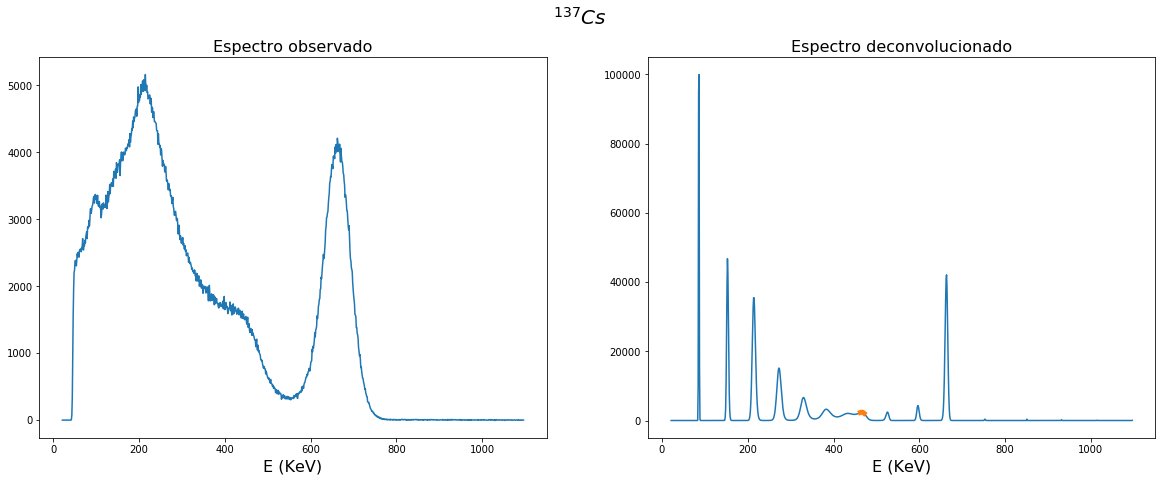

In [155]:
plt.figure(figsize=(20,7))
plt.suptitle("$^{137}Cs$", fontsize=20)
plt.subplot(122)
plt.title("Espectro deconvolucionado", fontsize=16)
plt.plot(x_v,x)
plt.plot(x_v[420:429],x[420:429], linewidth=5)
plt.xlabel("E (KeV)", fontsize=16)
plt.subplot(121)
plt.title("Espectro observado", fontsize=16)
plt.plot(x_v,h)
plt.xlabel("E (KeV)", fontsize=16)
plt.savefig("Cs_deconvolucionado.png")

Con este método observamos una espectro mucho más parecido al que nos muestra la bibliogría. Comparando las dos imágenes el borde compton se situan entre los canales 419 y 428, justo en el pico que da en el espectro deconvolucionado

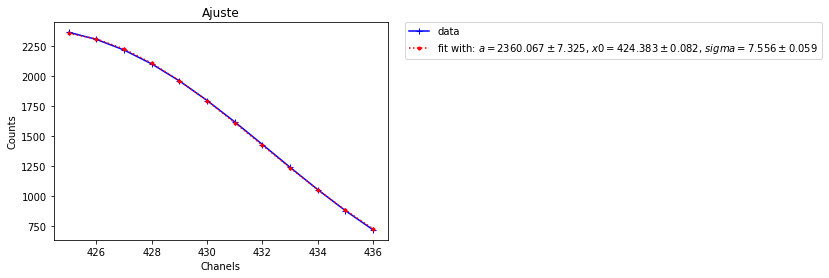

El borde compton se situa entre los valores 451.66 y 482.77 kEv a un 95% de confianza
El borde compton se situa entre los valores 467.15 y 467.27 kEv a un 95% de confianza


In [157]:
m=1.0503775221788605
b=21.451
limites=[425,437]
#plt.plot(x_v[limites[0]:limites[1]],x[limites[0]:limites[1]])
dat=ajuste_espc(np.array(x).reshape(n),limites)
G=ss.norm(dat[1],dat[2])
x_1,x_2=G.interval(0.95)

print('El borde compton se situa entre los valores {:.2f} y {:.2f} kEv a un 95% de confianza'.format(m*x_1+b,m*x_2+b))
print('El borde compton se situa entre los valores {:.2f} y {:.2f} kEv a un 95% de confianza'.format(m*(dat[1]-0.056)+b,m*(dat[1]+0.056)+b))

ERROR:root:Line magic function `%0.3f` not found.


945.0
[482.75063886] [967]


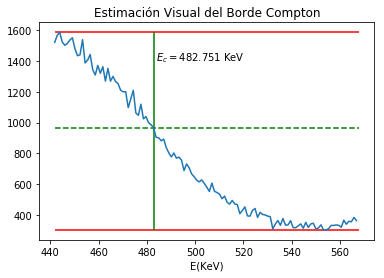

In [151]:
limites=[400,520]
l1,l2=limites
plt.title("Estimación Visual del Borde Compton")
plt.xlabel("E(KeV)")
plt.plot(x_v[l1:l2],h[l1:l2])

plt.hlines(np.max(h[l1:l2]),xmin=x_v[l1], xmax=x_v[l2],color='red')
plt.hlines(np.min(h[l1:l2]),xmin=x_v[l1], xmax=x_v[l2],color='red')

borde_comp=(np.max(h[l1:l2])+np.min(h[l1:l2]))/2
vector=np.abs(h[l1:l2]-borde_comp)
l=np.min(vector)
k=np.where(vector==l)

plt.vlines(x_v[l1:l2][k],ymin=np.min(h[l1:l2]), ymax=np.max(h[l1:l2]),color="g")
plt.hlines(h[l1:l2][k],xmin=x_v[l1], xmax=x_v[l2],color='g', linestyles="dashed")
#plt.annotate("$E_c={:.2f}$ kEv".format(x_v[l1:l2][k]),(x_v[l1:l2][k]+1,1400))
%0.3f' % (area)
plt.annotate("$E_c=%0.3f$ KeV" % (x_v[l1:l2][k]),(x_v[l1:l2][k]+1,1400))
print(borde_comp)
print(x_v[l1:l2][k],h[l1:l2][k])
plt.savefig("Compton_Visual.png")


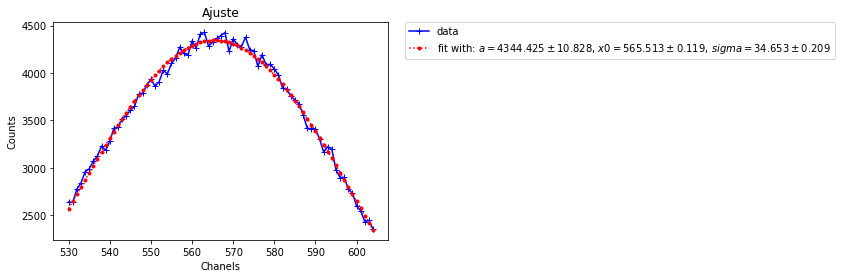

array([4344.42504667,  565.51278163,   34.65277134])

In [67]:
ajuste_espc(Ra_sinfiltro,[530,605])

[3]


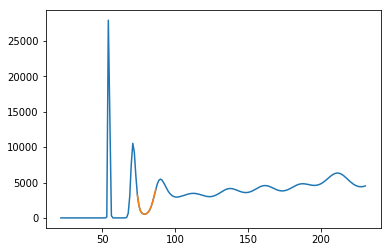

In [115]:
#plt.plot(x_v[:100],x[:100])
k=np.where(x[62:100]==np.max(x[62:100]))[0]
print(k)
plt.plot(x_v[:200],x[:200])
plt.plot(x_v[50:63],x[50:63])

In [114]:
m=np.max(x[160:180])
i=np.where(x[160:180]==m)[0]
x_v[160:180][i]

array([209.54339796])